In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
#read csv file
df = pd.read_csv(r'D:\Purwadhika\Capstone-2\airline passanger satisfaction.csv')

In [548]:
#Data dimension
df.shape

(103904, 25)

Dataset ini berisi mengenai hasil survey kepuasan penumpang maskapai pesawat. Hasil survey ini akan dipelajari faktor manakah yang memilik korelasi besar terhadap kepuasan penumpang maskapai.
Terdapat 25 kolom dalam dataset ini:
* Unnamed         : kolom index.
* id              : ID unik untuk tiap penumpang.
* Gender          : jenis kelamin penumpang.
* Customer type   : tipe penumpang (Loyal, disloyal).
* Age             : umur penumpang.
* Type of Travel  : alasan penerbangan penumpang (personal, bisnis).
* Class           : kelas bangku penumpang (Business, Eco, Eco Plus).
* Flight Distance : Jarak tempuh penerbangan.
* Inflight wifi service : tingkat kepuasan penumpang terhadap layanan wifi (0: tidak menilai; 1-5).
* Departure/Arrival time convenient : tingkat kepuasan penumpang terhadap waktu keberangkatan/ kedatangan (0: tidak menilai; 1-5).
* Gate location   : tingkat kepuasan penumpang terhadap lokasi gerbang keberangkatan (0: tidak menilai; 1-5).
* Food and drink  : tingkat kepuasan penumpang terhadap makanan dan minuman selama penerbangan (0: tidak menilai; 1-5).
* Online boarding  : tingkat kepuasan penumpang terhadap "online boarding" (0: tidak menilai; 1-5).
* Seat comfort : tingkat kepuasan penumpang terhadap kenyamanan kursi selama penerbangan (0: tidak menilai; 1-5).
* Inflight entertainment : tingkat kepuasan penumpang terhadap layanan hiburan dalam penerbangan (0: tidak menilai; 1-5).
* On-board service : tingkat kepuasan penumpang terhadap lokasi gerbang keberangkatan (0: tidak menilai; 1-5).
* Leg room service : tingkat kepuasan penumpang terhadap ruang kaki selama penerbangan (0: tidak menilai; 1-5).
* Baggage handling : tingkat kepuasan penumpang terhadap penanganan bagasi penumpang (0: tidak menilai; 1-5).
* Checkin service  : tingkat kepuasan penumpang terhadap pelayanan "check-in" (0: tidak menilai; 1-5).
* Inflight service : tingkat kepuasan penumpang terhadap pelayanan selama penerbangan (0: tidak menilai; 1-5).
* Cleanliness      : tingkat kepuasan penumpang terhadap kebersihan (0: tidak menilai; 1-5).
* Departure Delay in Minutes : keterlambatan keberangkatan dalam menit.
* Arrival Delay in Minutes   : keterlambatan kedatangan dalam menit.
* satisfaction    : Kepuasan penumpang (satisfied; neutral or dissastisfied).

In [549]:
display(df.head(),df.tail())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Kita akan drop kolom Unnamed:0 dan id karena tidak berkontribusi pada penentuan kepuasan penumpang.

In [550]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [551]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* Rata-rata umur penumpang: 39 tahun.
* Rata-rata jarak terbang: 1189,4 km.
* Rata-rata keterlambatan keberangkatan: 14,8 menit.
* Rata-rata keterlambatan kedatangan: 15,2 menit.
* Inflight wifi service memiliki rata-rata rating terendah (2.73/5.00).
* Inflight service memiliki rata-rata rating tertinggi (3.64/5.00)

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Dapat dilihat bahwa jumlah data non-null tiap kolom sama kecuali *Arrival Delay in Minutes*. Sehingga semua kolom tidak memiliki data kosong kecuali kolom *Arrival Delay in Minutes*.

Dataset ini terbagi menjadi dua tipe data, tipe data object (string) dan tipe data number (integer dan float).

In [553]:
display(df.describe(), df.describe(include='object'))

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### Missing Values

In [554]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [555]:
df.isna().sum()/len(df)*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

Terdapat 310 data kosong pada kolom *Arrival Delay in Minutes*. Dimana jumlah tersebut merupakan 0.298% dari total keseluruhan data.
Mari kita lihat perseberan data pada baris yang sama dimana kolom *Arrival Delay in Minutes* kosong.

<AxesSubplot:xlabel='Flight Distance'>

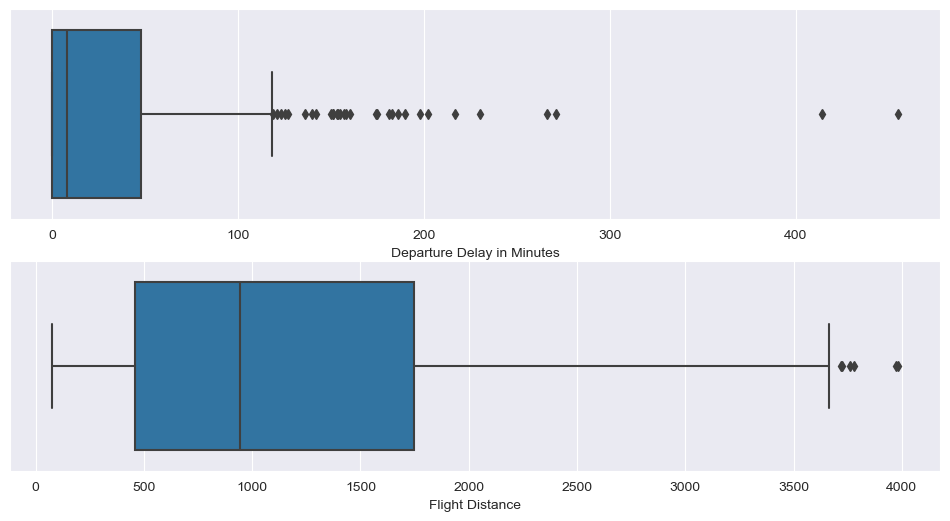

In [556]:
depart_arrive_na = df.loc[df['Arrival Delay in Minutes'].isna()==True,'Departure Delay in Minutes']
distance_na =df.loc[df['Arrival Delay in Minutes'].isna()==True,'Flight Distance']

fig, axes = plt.subplots(2,1,figsize = (12,6))
sns.boxplot(x=depart_arrive_na, ax = axes[0])
sns.boxplot(x=distance_na, ax = axes[1])

In [557]:
median_depart = df['Departure Delay in Minutes'].median()
print(f'Median kolom Departure Delay: {median_depart}')
median_distance = df['Flight Distance'].median()
print(f'Median kolom Flight Distance: {median_distance}')
df_no_na = df.dropna()
median_depart_na = df_no_na['Departure Delay in Minutes'].median()
print(f'Median kolom Departure Delay setelah baris kosong dihapus: {median_depart_na}')
median_distance_na = df_no_na['Flight Distance'].median()
print(f'Median kolom Flight Distance setelah baris kosong dihapus: {median_distance_na}')

Median kolom Departure Delay: 0.0
Median kolom Flight Distance: 843.0
Median kolom Departure Delay setelah baris kosong dihapus: 0.0
Median kolom Flight Distance setelah baris kosong dihapus: 842.0


Dapat kita lihat pada *boxplot* diatas, terdapat banyak outlier pada baris-baris yang berisi data kosong. Namun setelah penghitungan perbedaan median diatas, data setelah data kosong di drop perbedaannya tidak signifikan. Makan missing values ini akan kita drop.

In [558]:
df.dropna(inplace=True)
print(df.shape)

(103594, 23)


Setelah kita drop, baris data berkurang dari 103904 baris menjadi 103594 baris.

### Data Analysis

Kita akan melakukan analysis data, untuk mencari tahu kategori apa yang paling berpengaruh dengan kepuasan penumpang.

Mari kita lihat persebaran distribusi data dengan tipe data number (Age, Flight Distance, Deaparture Delay in Minutes, Arrival Delay in Minutes).

In [559]:
num_list = ['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']
num_list

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

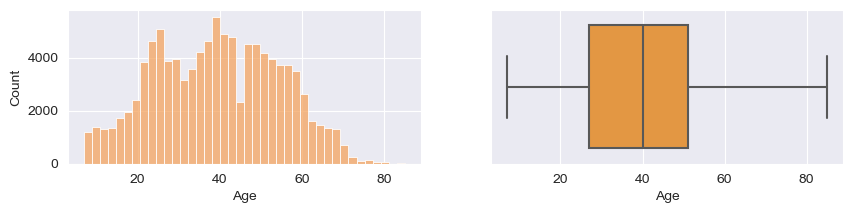

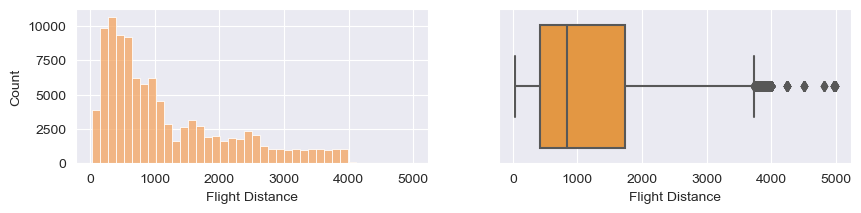

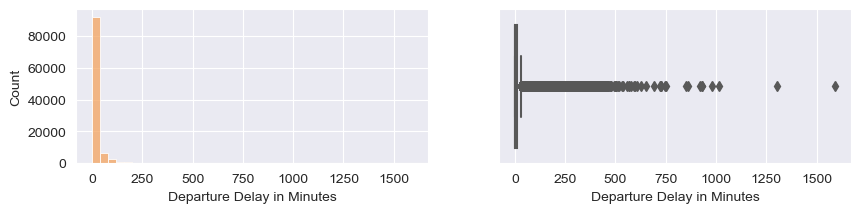

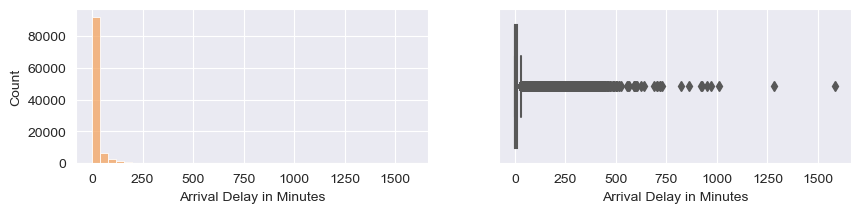

In [560]:
sns.set_style("darkgrid")
for col in num_list:
    fig, ax = plt.subplots(1, 2, figsize = (10, 2))
    sns.histplot(df[col], ax = ax[0], bins = 40, color = 'sandybrown')
    sns.boxplot(x = df[col], ax= ax[1], palette = 'YlOrBr')

Bagaimana persebaran data pada data umur dan jarak terbang ? Serta seberapa sering terjadi keterlambatan ?
* Persebaran data umur cukup terdistribusi normal.
* Mayoritas jarak penerbangan berada dibawah 1000 km dan memiliki beberapa outlier dengan jarak diatas 4000 km.
* Kebanyakan penerbangan tidak terjadi keterlambatan, sehingga hampir seluruh keterlambatan yang terjadi merupakan outlier.
* Persebaran data keterlambatan keberangkata dan kedatangan cukup identik. Menandakan jika keberangkatan terlambat maka kedatangan juga akan terlambat.

Kemudian mari kita lihat persebaran data untuk kategori data *object*.

In [561]:
object_list = df.select_dtypes(object).columns.to_list()
object_list

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

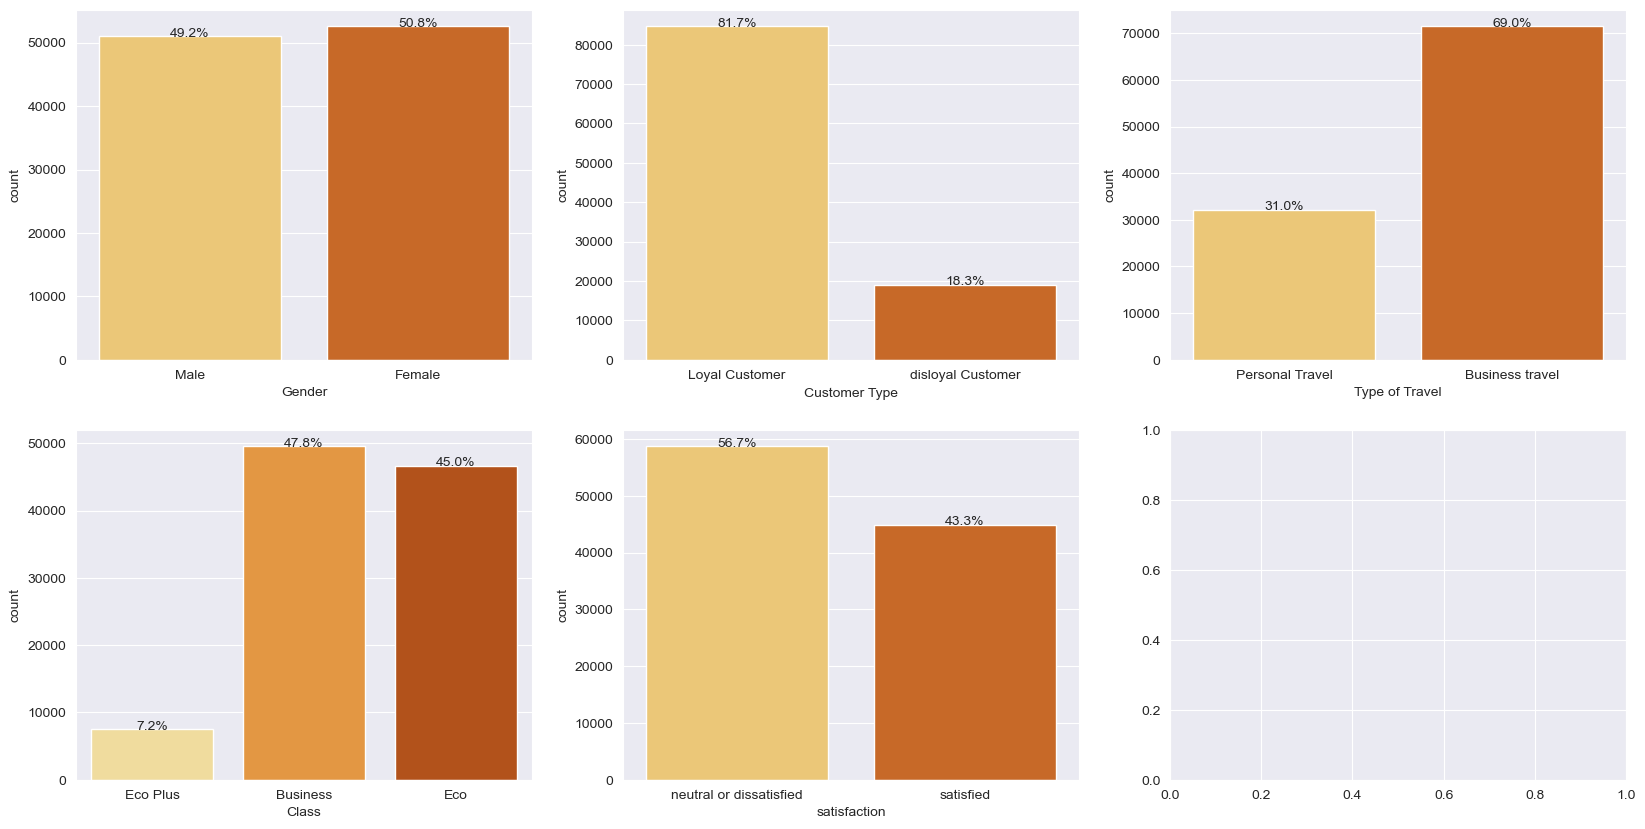

In [562]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
total = len(df)
for i, col in enumerate(object_list):
    ax = sns.countplot(x = col, data = df, palette= 'YlOrBr', ax = axes[i//3, i%3])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
plt.show()

Bagaimana distribusi data untuk kolom *gender*, *customer type*, *type of travel*, *class*, dan *satisfaction*?
* Gender penumpang telihat seimbang, dimana 49.2% adalah penumpang pria dan 50.8% penumpang adalah wanita.
* Mayoritas penumpang adalah penumpang Loyal, sebanyak 81.7%.
* Kebanyakan alasan penerbangan penumpang adalah perjalanan bisnis sebesar 69.0%.
* Kelas *business* menjadi kelas penerbangan paling populer (47.8%), diikuti oleh kelas *economy* (45.0%), dan kelas *economy plus* menjadi kelas paling tidak populer (7.2%).
* Hanya 43.3% dari total penumpang puas dengan pengalaman terbang mereka, sisanya 56.7% merasa netral atau tidak puas.

<AxesSubplot:xlabel='Class', ylabel='Count'>

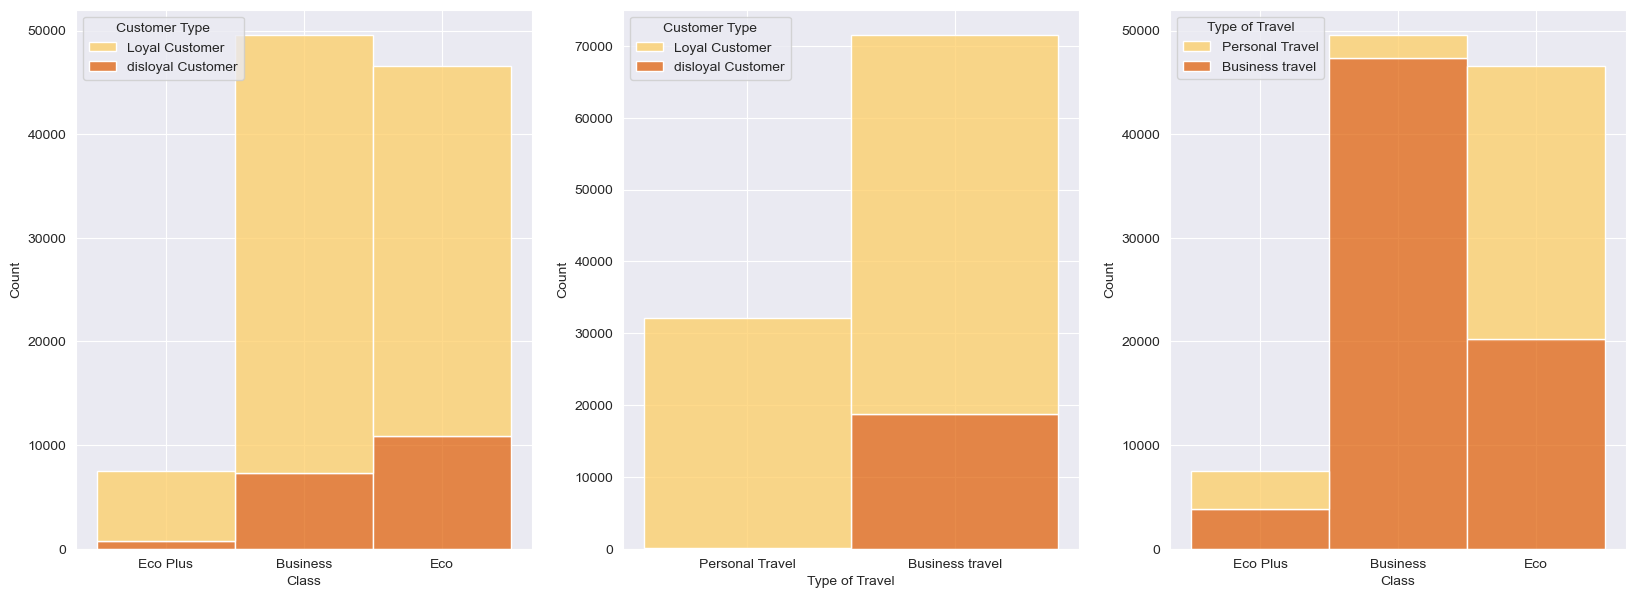

In [563]:
fig, axes = plt.subplots(1, 3, figsize = (20,7))
sns.histplot(x = 'Class' , hue = 'Customer Type', data = df, multiple = "stack", palette = 'YlOrBr', ax = axes[0])
sns.histplot(x = 'Type of Travel' , hue = 'Customer Type', data = df, multiple = "stack", palette = 'YlOrBr', ax = axes[1])
sns.histplot(x = 'Class' , hue = 'Type of Travel', data = df, multiple = "stack", palette = 'YlOrBr', ax = axes[2])

Dari diagram diatas kita dapat meniympulkan:
* Hampir seluruh penumpang yang terbang dengan alasan personal adalah customer Loyal.
* Alasan penumpang kelas bisnis untuk terbang hampir seluruhnya adalah untuk alasan bisnis.
* Persebaraan tipe customer pada untuk tiap-tiap tipe kelas cukup sama.

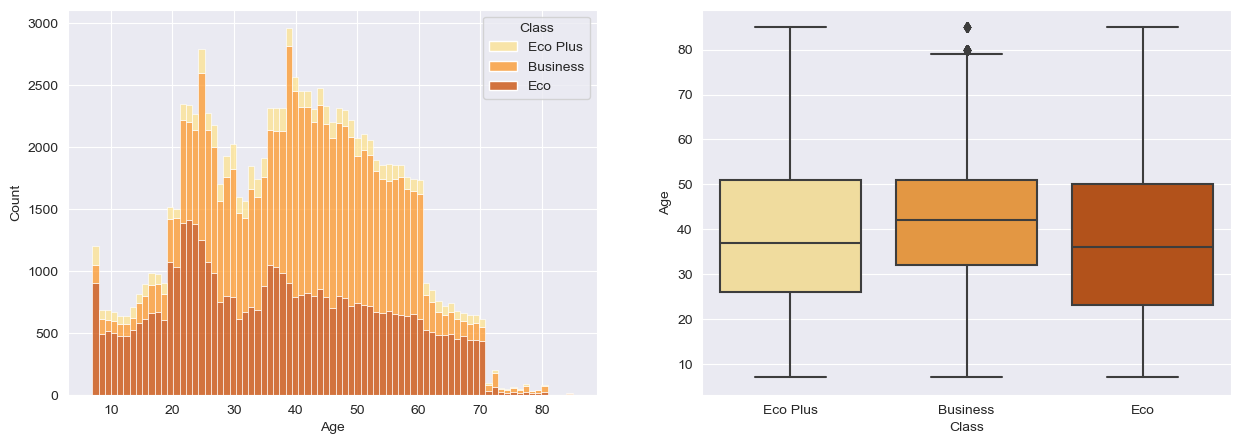

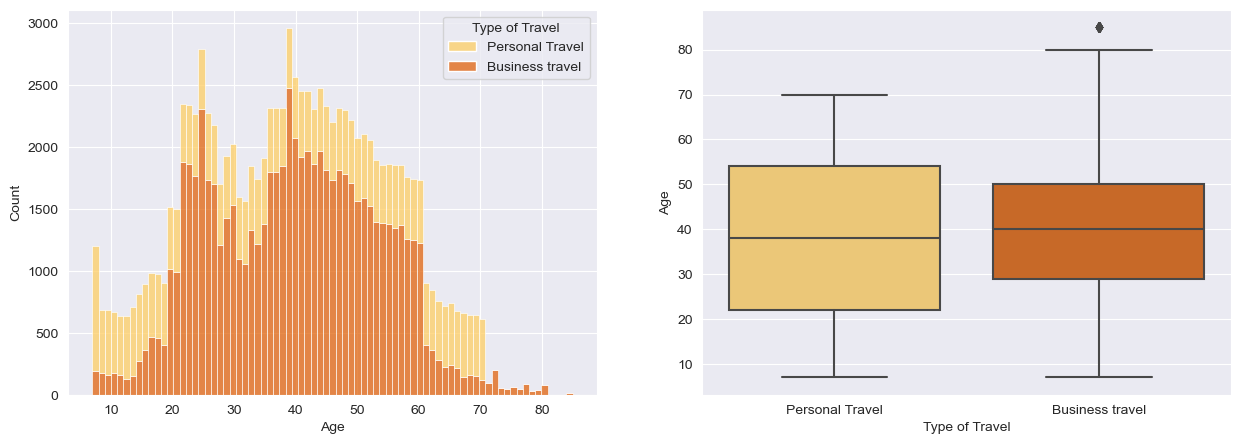

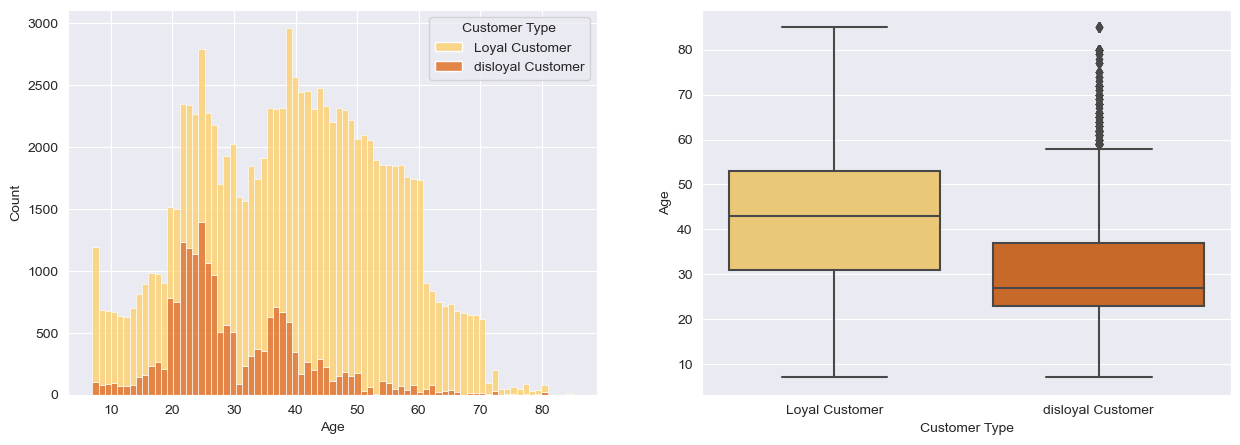

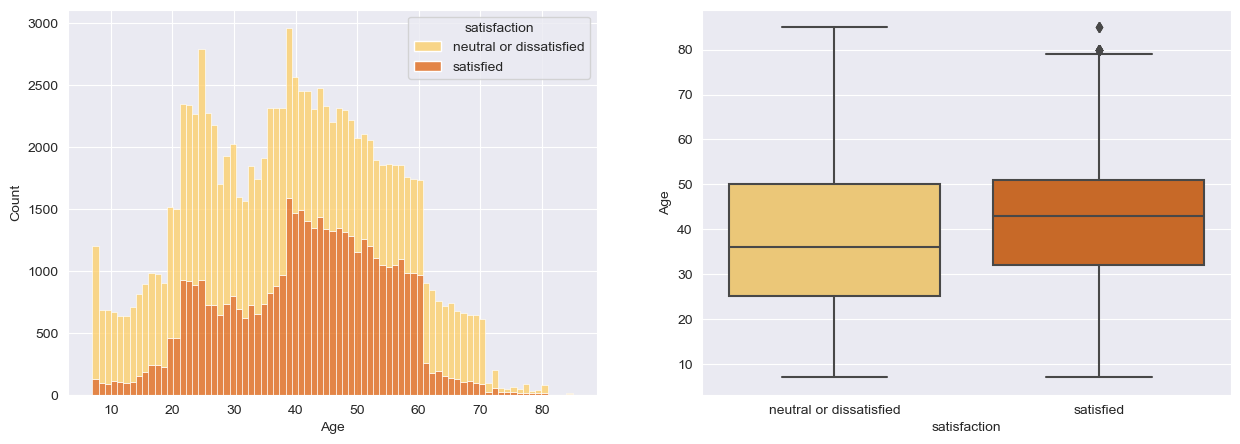

In [564]:
age_list = ['Class', 'Type of Travel', 'Customer Type', 'satisfaction']
for col in age_list:
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    sns.histplot(data = df, x = 'Age', hue = col, ax = ax[0], multiple = "stack", palette = 'YlOrBr')
    sns.boxplot(data=df, x = col, y = 'Age', ax= ax[1], palette = 'YlOrBr')

Apa insight yang didapatkan dari persebaran data umur dengan data-data jenis object ?
* Customer di kelas bisnis memiliki median umur yang lebih tinggi dibanding kelas yang lain.
* Meskipun memiliki median yang mirip, penumpang di dengan alasan penerbangan untuk personal memiliki persebaran umur yang lebih luas. Dimana penumpang dengan alasan terbang untuk bisnis kebanyakan berada di rentang umur 30-50 tahun.
* Umur customer yang loyal memiliki median yang lebih tinggi dibanding dengan customer yang tidak loyal. Customer loyal kebanyakan berada di rentang umur 30-50 tahun, sedangkan customer tidak loyal kebanyakan berada di rentang umur 20-40 tahun.
* Customer yang puas pada servis penerbangan kebanyakan berumur 30-50 tahun. Customer muda kebanyakan bersikap netral/ tidak puas dengan penerbangan mereka. 

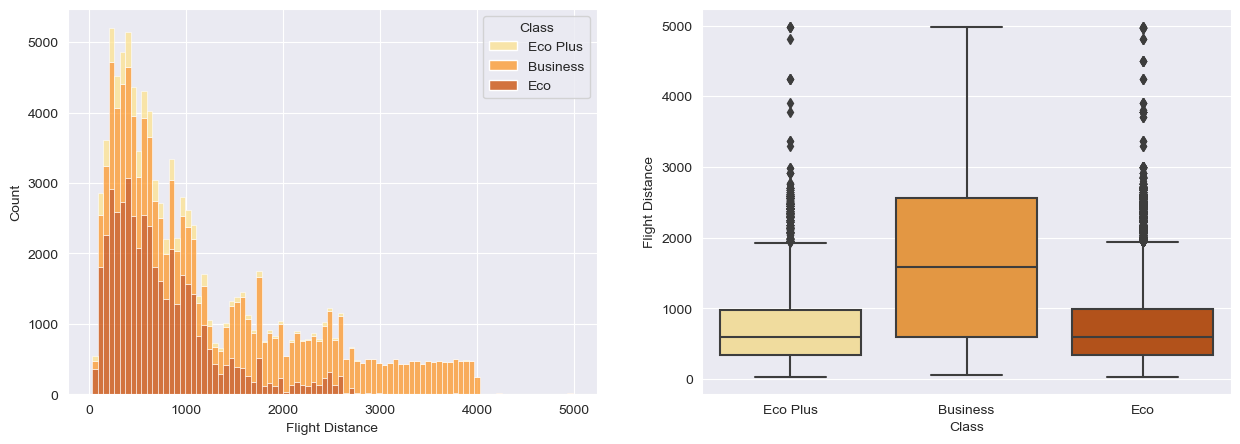

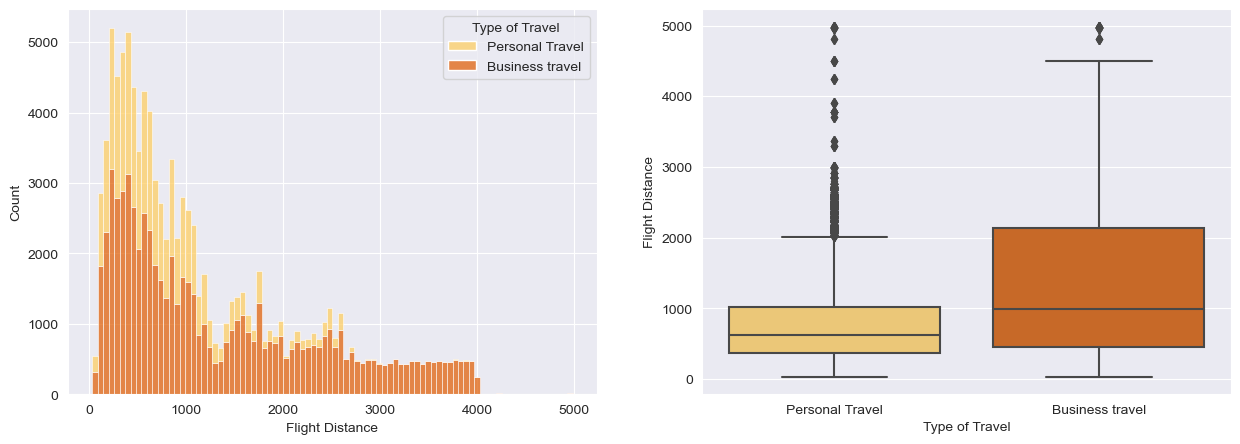

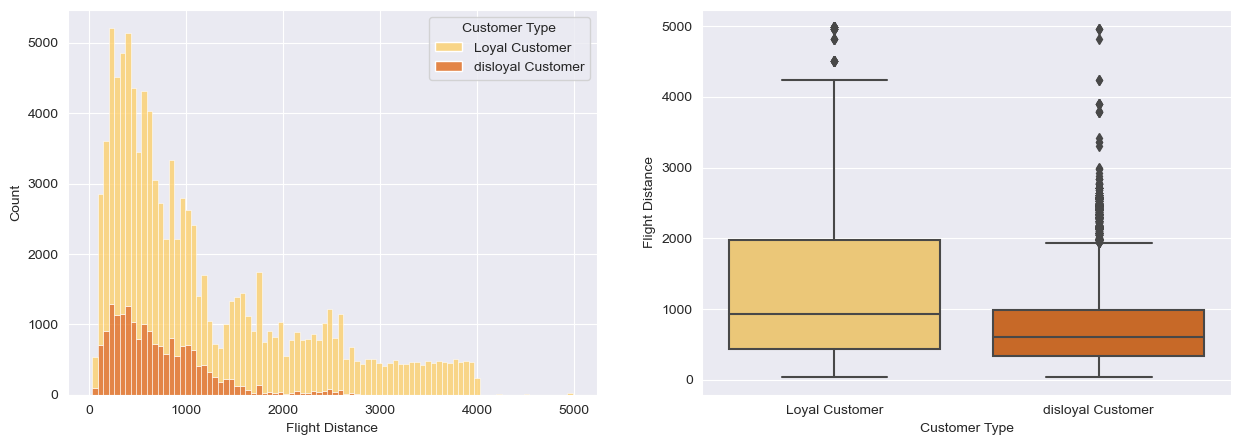

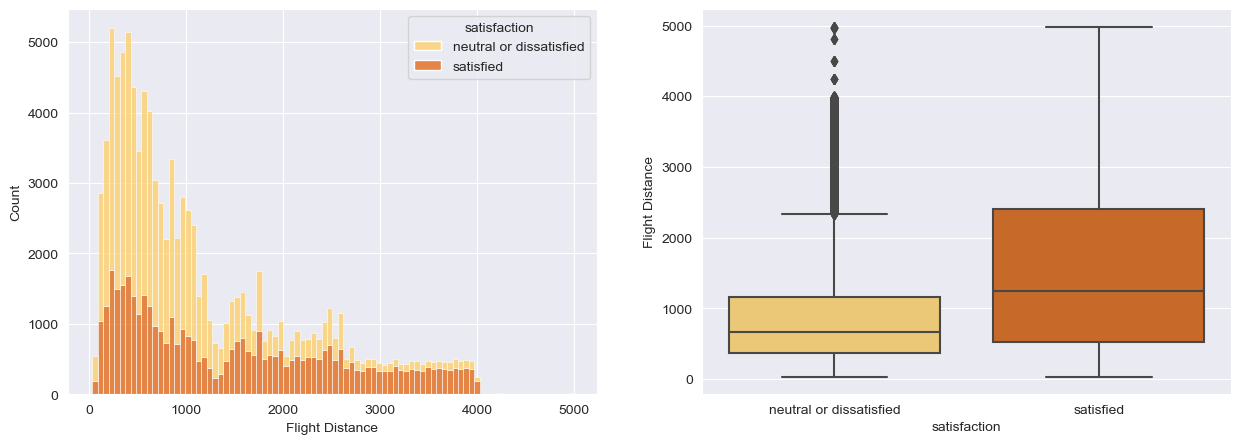

In [565]:
distance_list = ['Class', 'Type of Travel', 'Customer Type', 'satisfaction']
for col in distance_list:
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    sns.histplot(data = df, x = 'Flight Distance', hue = col, ax = ax[0], multiple = "stack", palette = 'YlOrBr')
    sns.boxplot(data=df, x = col, y = 'Flight Distance', ax= ax[1], palette = 'YlOrBr')

Apa insight yang didapatkan dari persebaran data jarak terbang dengan data-data jenis object ?
* Pada perjalanan jauh kebanyakan penumpang memilih untuk menggunakan kelas bisnis, terbang untuk keperluan bisnis, dan merupakan customer loyal.
* Kebanyakan penumpang yang netral/ tidak puas, terbang di jarak pendek (dibawah 1500 km).

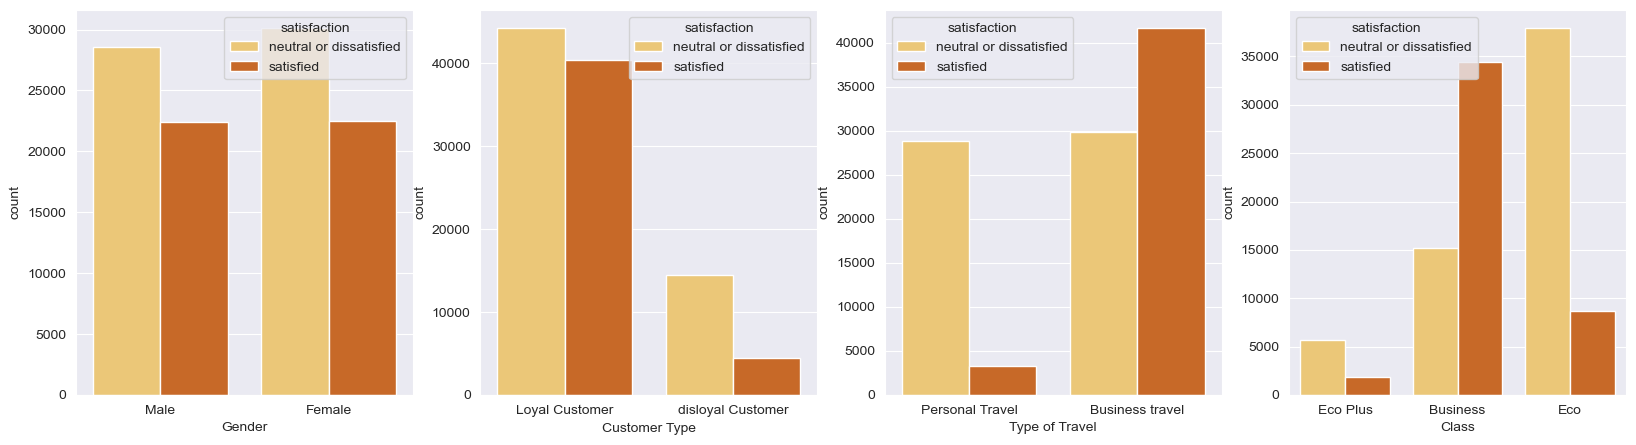

In [566]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i, col in enumerate(object_list[0:-1]):
    ax_3 = sns.countplot(x = col, data = df, hue='satisfaction', palette= 'YlOrBr', ax = axes[i%4])
plt.show()

Bagaimana korelasi kepuasan penumpang dengan *gender*, *customer type*, *type of travel*, dan *class* ?
* Jenis gender tidak mempengaruhi kepuasan penumpang, baik pria maupun wanita memiliki persebaran puas dan tidak puas yang identik.
* Customer yang tidak loyal, lebih mungkin untuk netral atau tidak puas terhadap penerbangan mereka.
* Penumpang di yang terbang untuk bisnis, rata-rata lebih puas dengan penerbangan mereka. Sedangkan penumbang dengan alasan pribadi, hanya sebagian kecil yang puas selama penerbangan mereka. Dapat dilihat pada seri tabel sebelum nya, penumpang dengan alasan bisnis lebih banyak terbang dalam kelas bisnis. Dimana kita akan jabarkan pada poin berikut ini.
* Penumpang di kelas bisnis, lebih mungkin untuk merasa puas selama penerbangan mereka dibandingkan pada kelas lain.
* Jadi dapat kita lihat juga dari diagram-diagram sebelumnya juga, bahwa penumpang yang netral/ tidak puas dengan penerbangan ini adalah penumpang dengan alasan terbang personal, menggunakan kelas ekonomi, terbang untuk jarak pendek, dan pelanggan tidak loyal.

In [567]:
survey_column = ['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

Berikutnya, mari kita lihat persebaran data kategorikal hasil pengisian survey (1-5). Kemudian kita lihat juga korelasi penilaian dengan kepuasan penumpang.

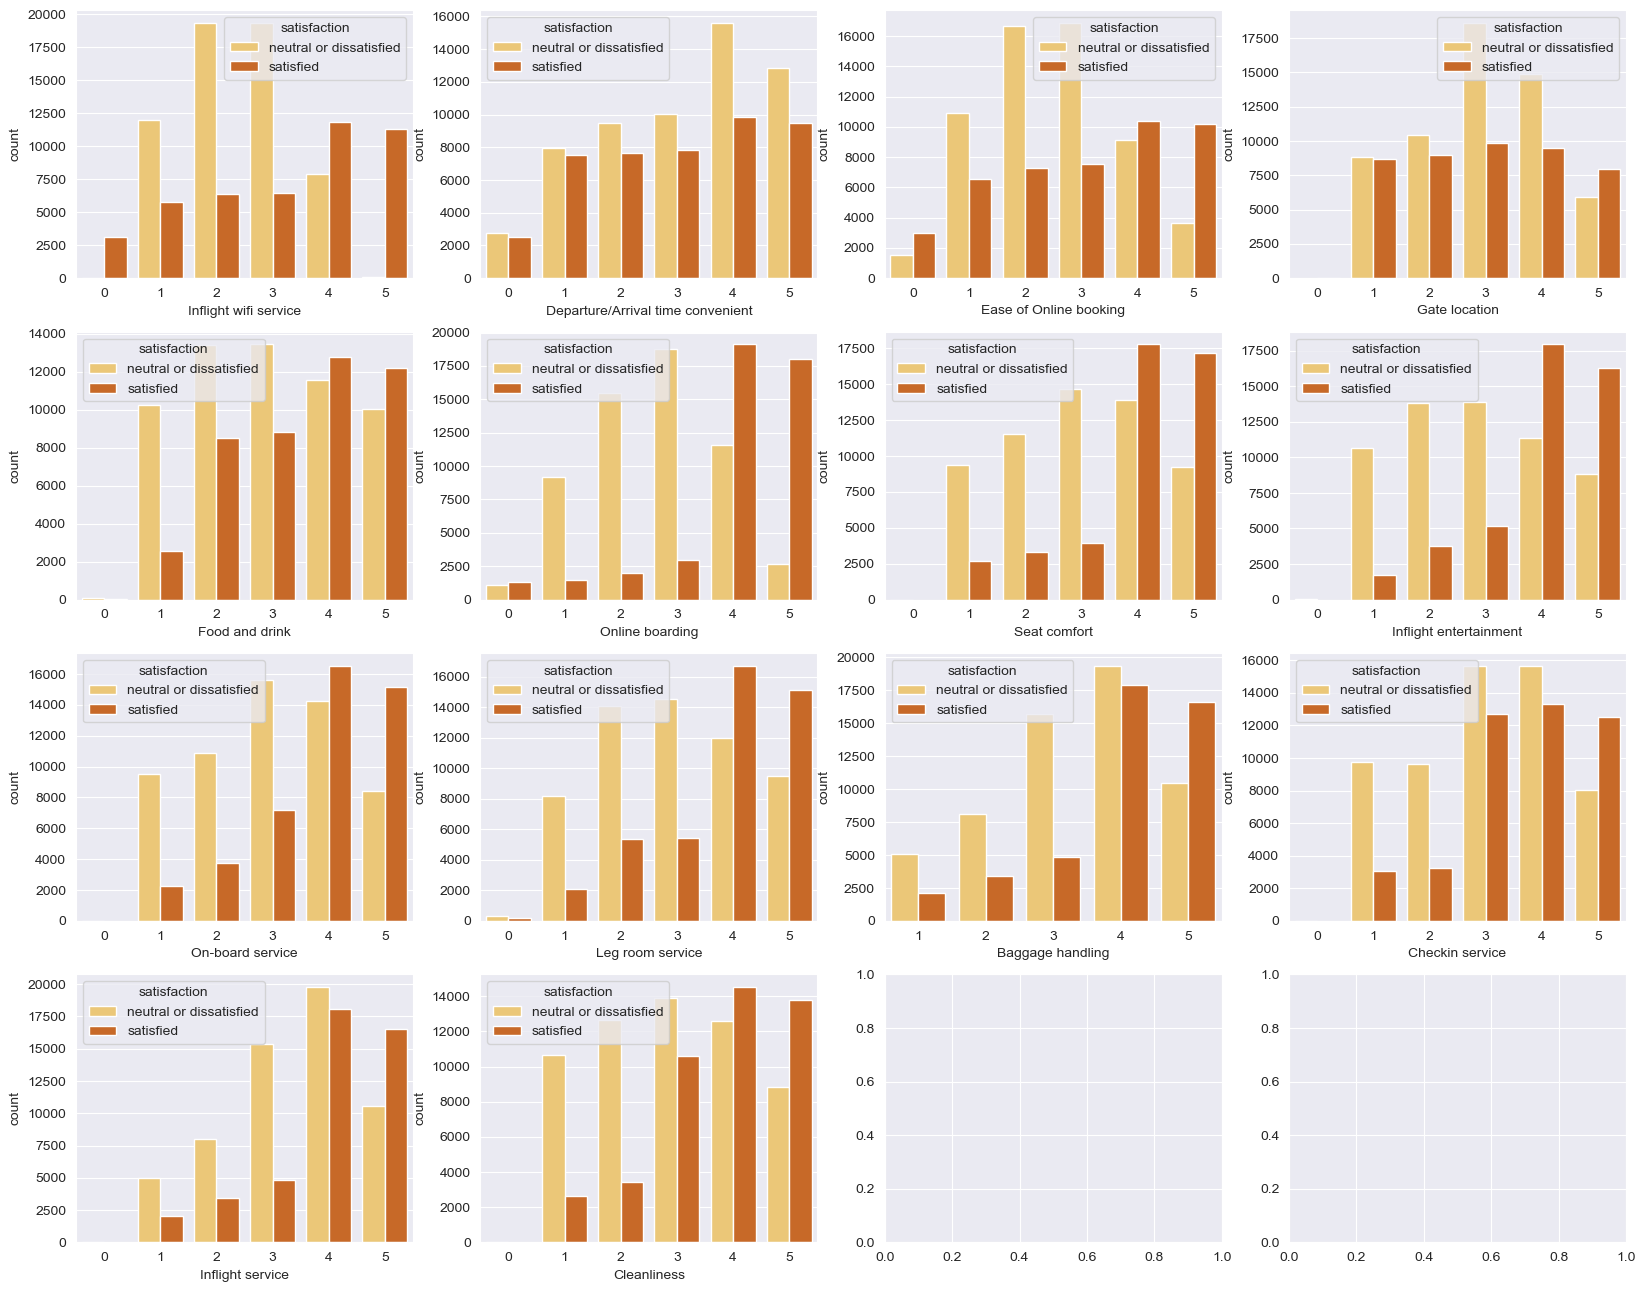

In [568]:
fig, axes = plt.subplots(4, 4, figsize = (20, 16))
for i, col in enumerate(survey_column):
    sns.countplot(x = col, data = df, hue = 'satisfaction', palette= 'YlOrBr', ax = axes[i//4, i%4])

Apa insight data yang dapat diambil dari hasil survey penumpang ?
* **Inflight wifi Service, Ease of online booking, Food and drink, Online boarding, Seat Comfort, Inflight Entertainment, On-board Service, Leg room service, Bagage handling, checkin service, inflight service, Cleanliness :** Meliliki keterkaitan yang kuat pada tingkat kepuasan penumpang. Penumpang yang memberikan skor tinggi (4 dan 5) hampir semua merasa puas dengan penerbangan mereka. Sebaliknya, penumpang yang memberi skor rendah (1-3), sebagian besar merasa netral/ tidak puas.
* **Departure/ Arrival time convenient:** Melihat persebaran pada tiap-tiap skor pada kategori ini, perbandingan hasil kepuasan penumpang cukup identik. Menandakan tidak ada keterkaitan yang cukup kuat bahwa hasil penilaian kategori ini berpengaruh pada kepuasan penumpang. Mungkin juga dikarenakan, sangat sedikit terjadi keterlambatan pada penerbangan maskapai ini.
* **Gate location:** Ada beberapa trend yang berbeda pada kategori ini, dimana skor menengah keatas (3 dan 4) memiliki tingkat netral/ ketidakpuasan yang lebih tinggi daripada di skor rendah (1 dan 2). Di skor tertinggi (5) terlihat penumpang lebih mungkin untuk puas dengan penerbangan mereka.


Karena customer dengan alasan terbang personal dan penumpang kelas eco memiliki ratio kepuasan yang kecil, mari kita lihat apa yang menyebabkan ketidakpuasan mereka.

Berikut adalah data survey yang telah di filter berdasarkan pelanggan yang tipe travel nya adalah *Personal Travel*.

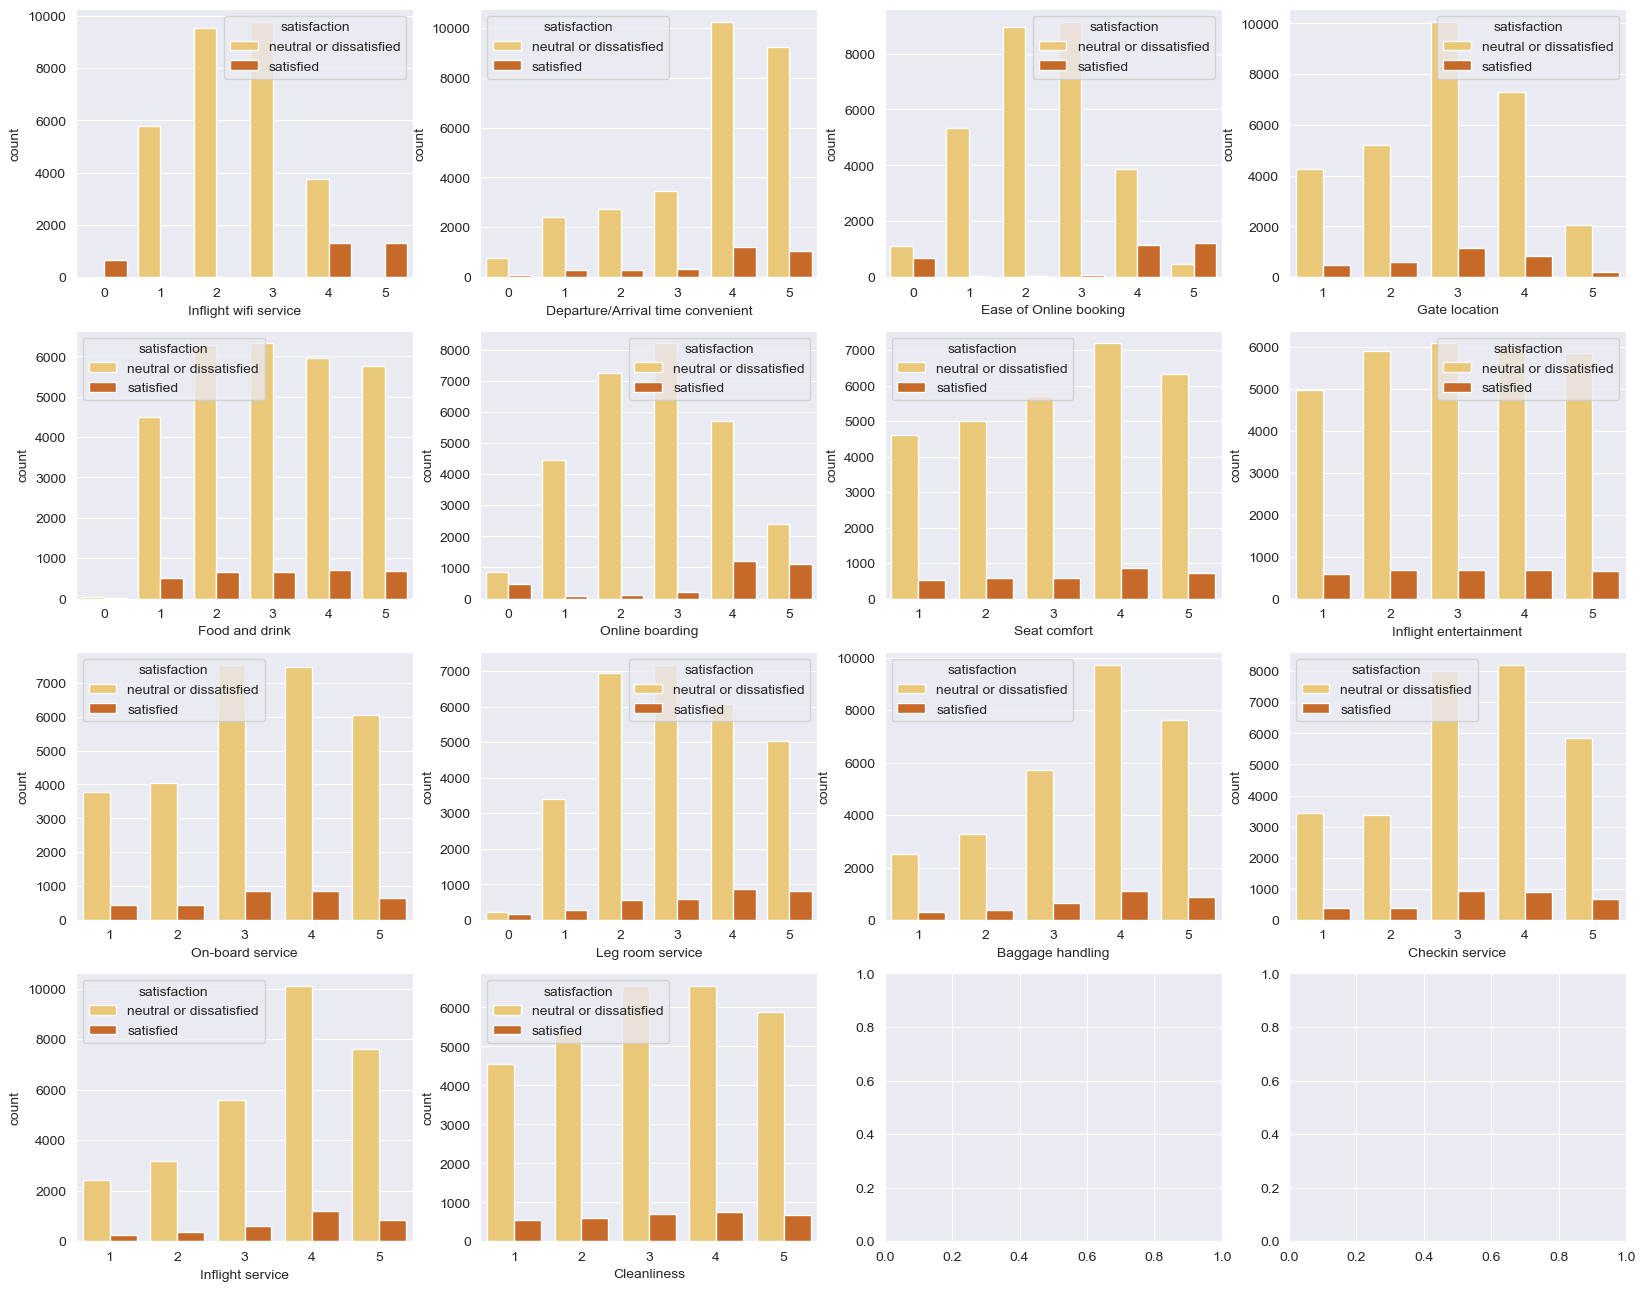

In [569]:
fig, axes = plt.subplots(4, 4, figsize = (20, 16))
for i, col in enumerate(survey_column):
    sns.countplot(x = col, data = df[df['Type of Travel']=='Personal Travel'], hue = 'satisfaction', palette= 'YlOrBr', ax = axes[i//4, i%4])

**Inflight wifi service, dan ease of online booking** menarik perhatian, karena pada skor penilaian tinggi penumpang yang sebagian besar merasa puas. Sehingga kebanyakan penumpang yang senang dengan kategori tersebut, merasa puas secara keseluruhan. Berbeda dengan kategori lain, dimana meskipun menorehkan skor tinggi, tidak otomatis memberikan kepuasan pada penumpang.

Berikut adalah data survey yang telah di filter berdasarkan pelanggan yang kelas nya adalah *Eco*.

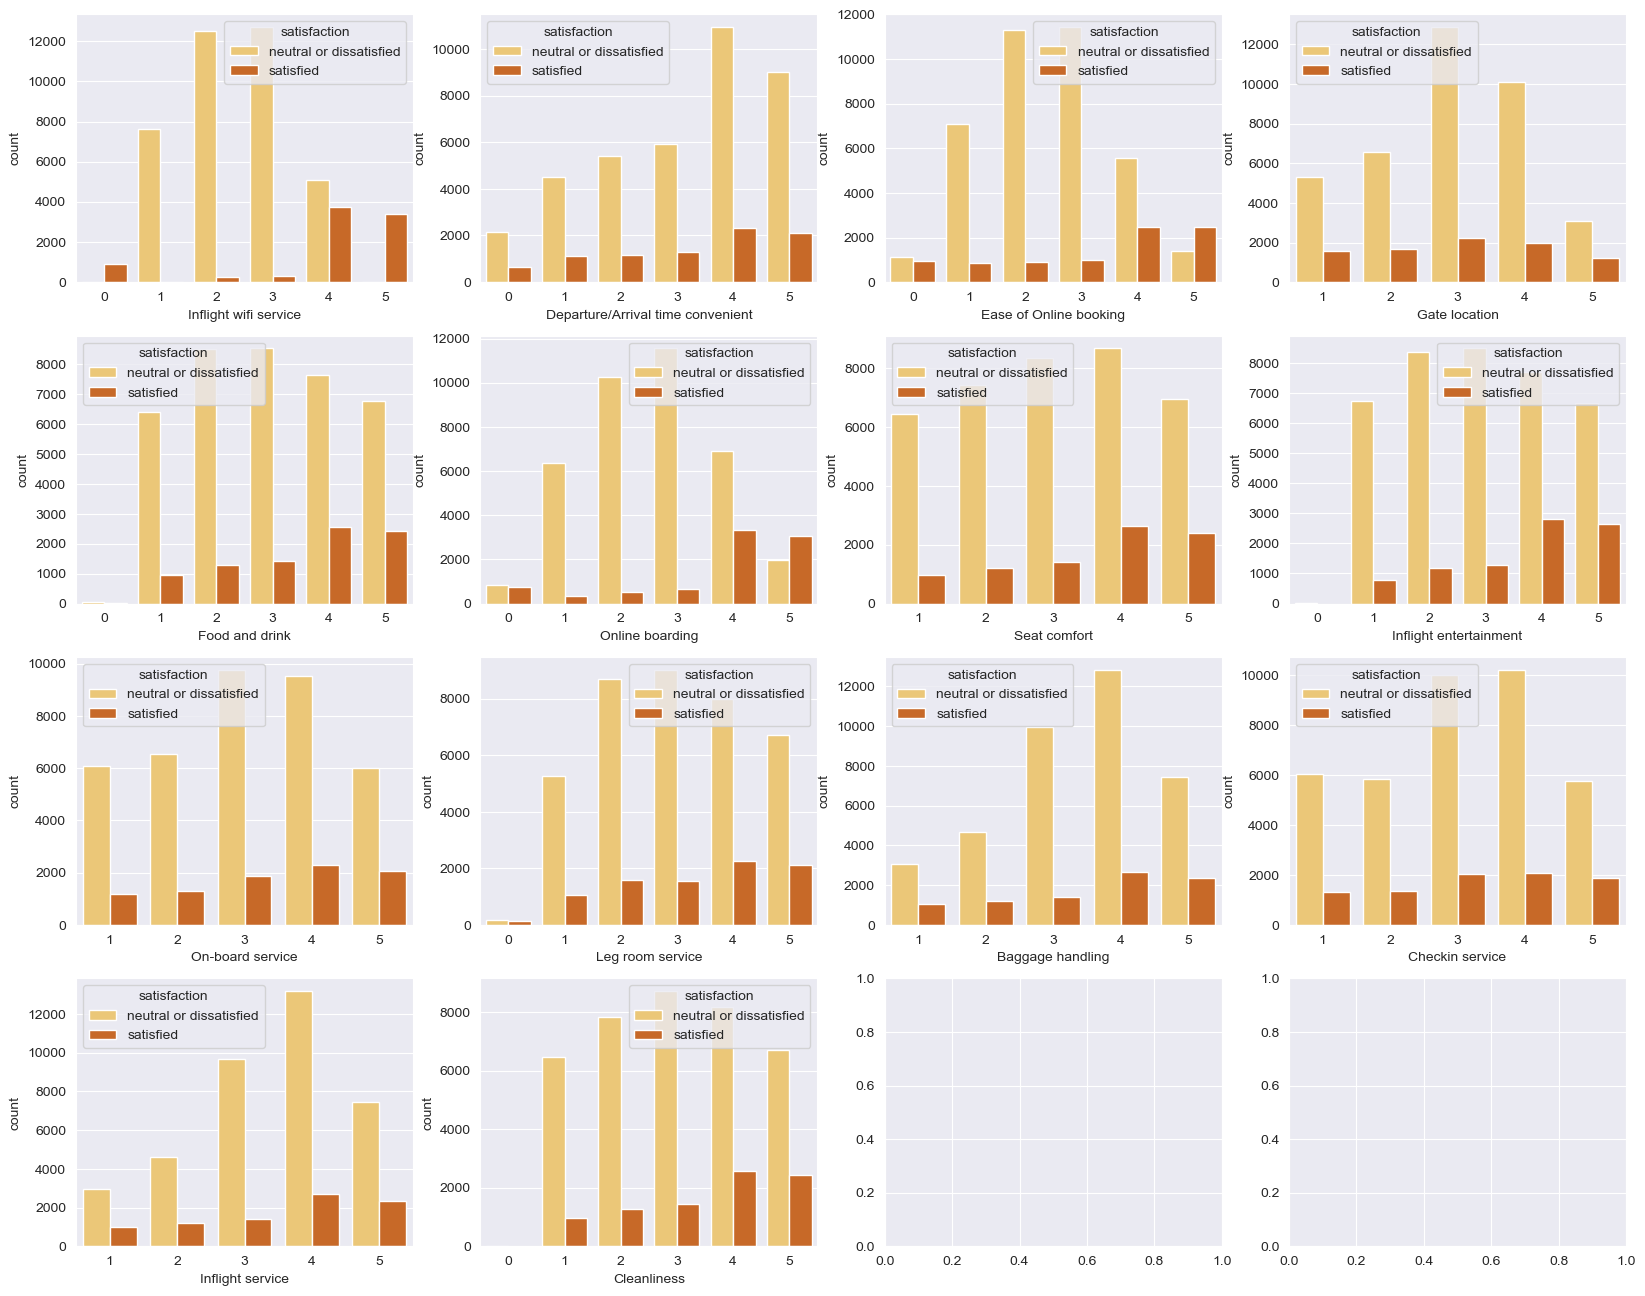

In [570]:
fig, axes = plt.subplots(4, 4, figsize = (20, 16))
for i, col in enumerate(survey_column):
    sns.countplot(x = col, data = df[df['Class']=='Eco'], hue = 'satisfaction', palette= 'YlOrBr', ax = axes[i//4, i%4])

Sama seperti sebelumnya **Inflight wifi service, ease of online booking, Inflight entertainment, dan online boarding** memiliki efek yang besar pada kepuasan penumpang kelas *Eco*. Namun disini, kategori **Food and Drink, Seat comfort,  On-board service, inflight service, dan cleanliness** juga memiliki dampak pada penilaian meski lebih kecil. 

Data-data object akan kita encode terlebih dahulu, demi membuat peta heatmap matrix untuk keterkaitan tiap-tiap kategorinya.

In [571]:
def encode_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    
def encode_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    
def encode_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    
def encode_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    
def encode_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    
def process_data(data):
    encoded_df = data
    encoded_df['Gender'] = data['Gender'].apply(encode_gender)
    encoded_df['Customer Type'] = data['Customer Type'].apply(encode_customer_type)
    encoded_df['Type of Travel'] = data['Type of Travel'].apply(encode_travel_type)
    encoded_df['Class'] = data['Class'].apply(encode_class)
    encoded_df['satisfaction'] = data['satisfaction'].apply(encode_satisfaction)
    
    return encoded_df
encoded_df = process_data(df)
encoded_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


<AxesSubplot:>

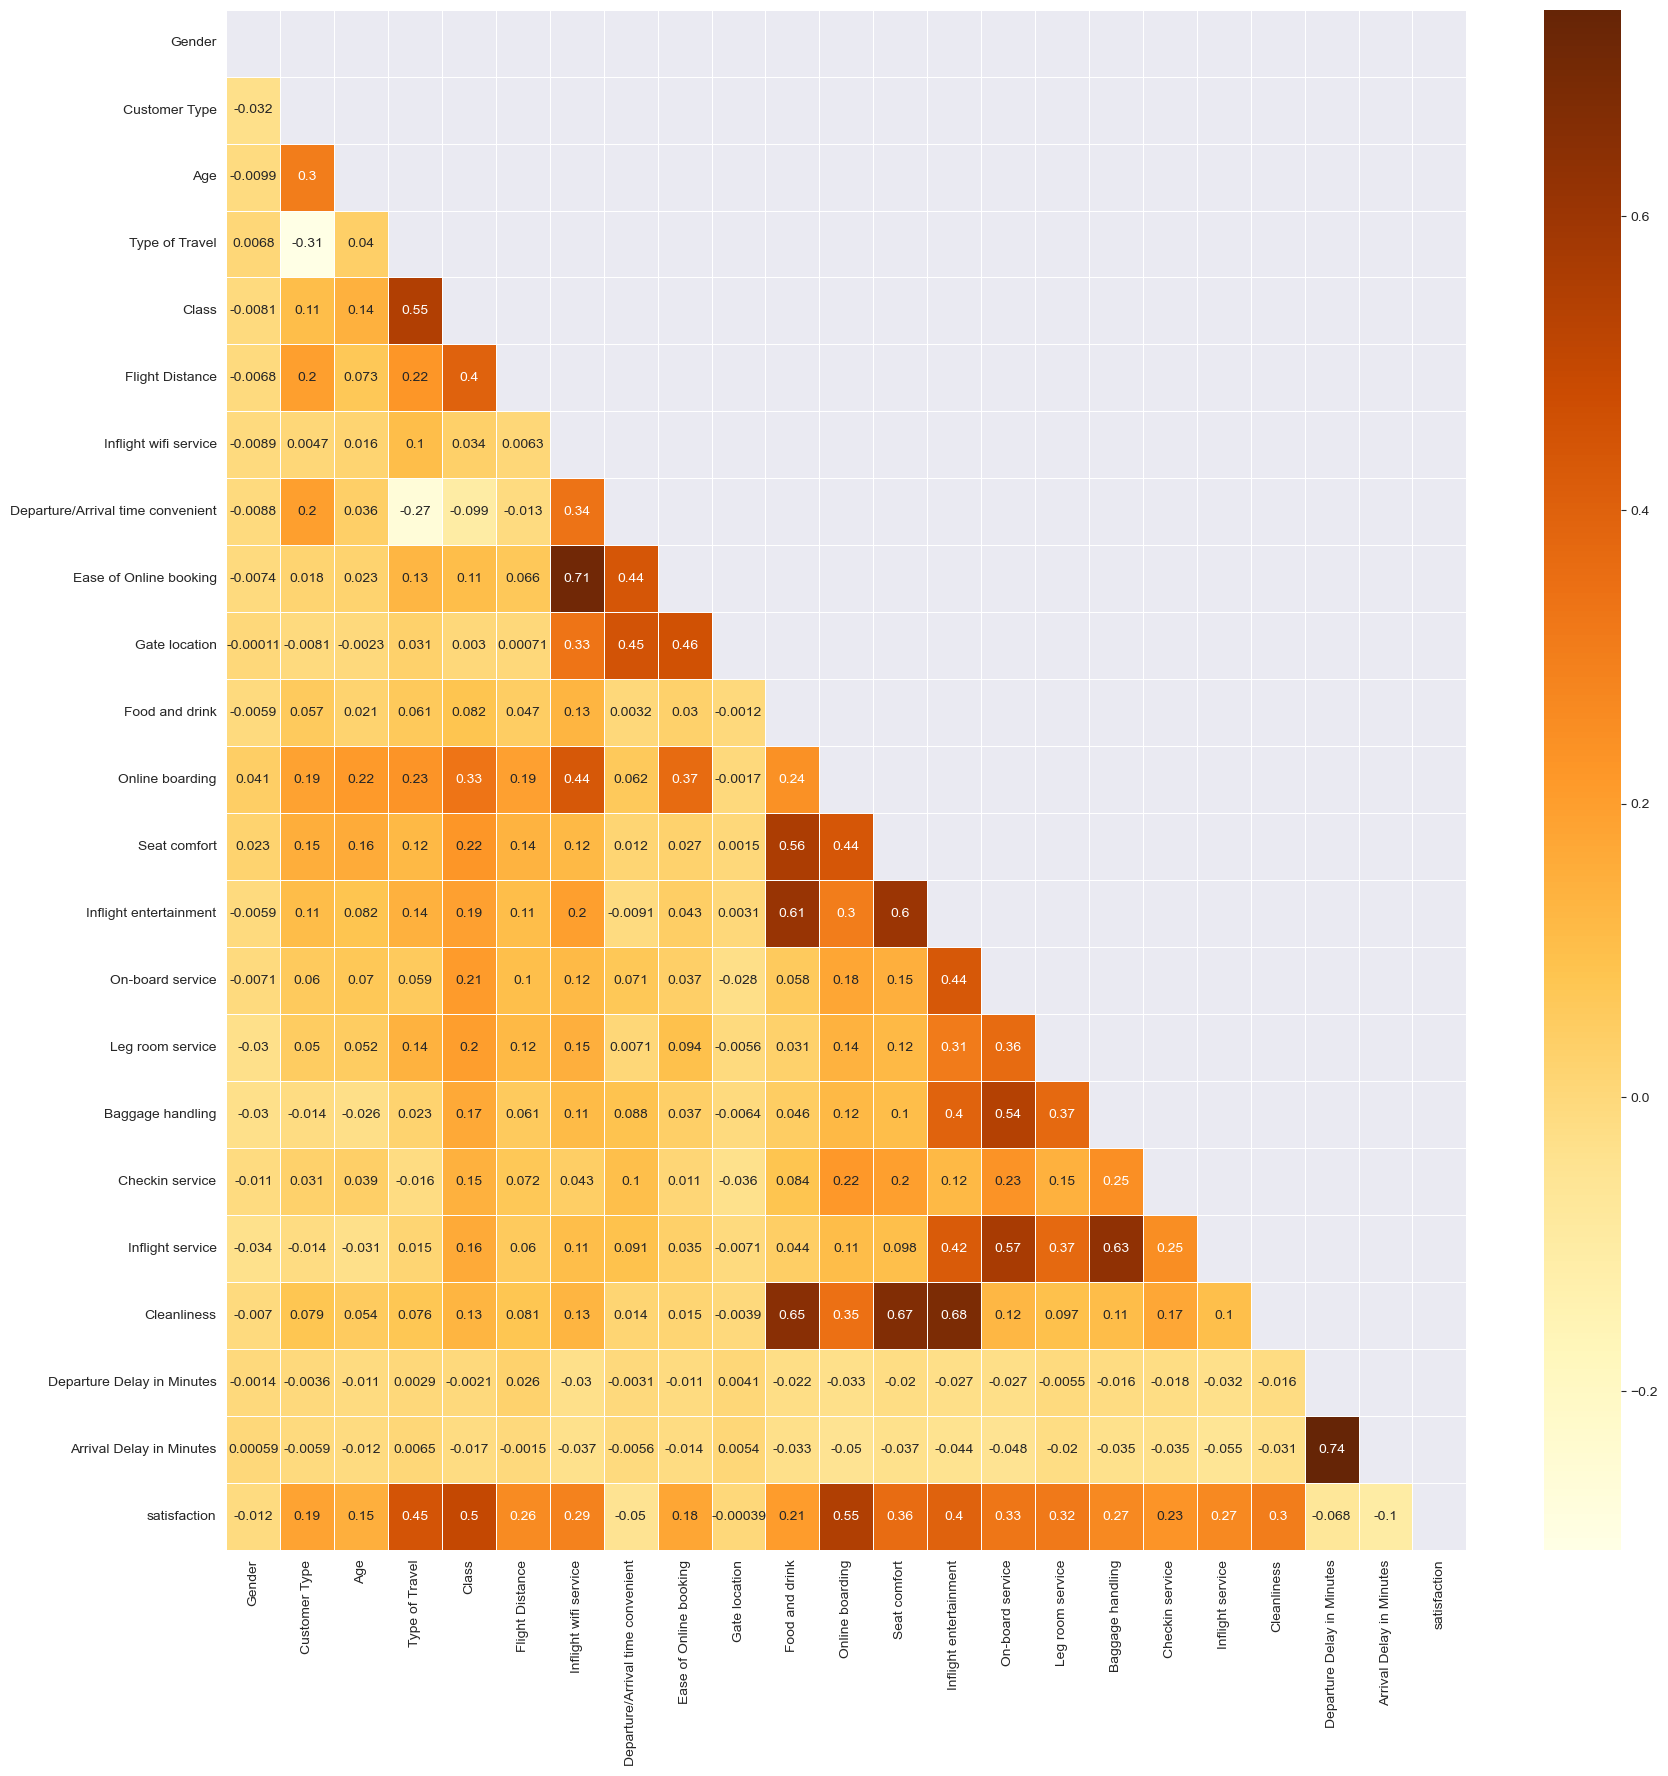

In [572]:
corr = encoded_df.corr(method='spearman')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, annot = True, mask=mask, cmap='YlOrBr', linewidths=.5)


Kategori apa yang memiliki dampak tinggi terhadap kepuasan penumpang ? kemudian kategori apa yang tidak terlalu mempengaruhi ?
* Sesuai dengan analisis diagram antara tingkat kepuasan dan hasil survey penumpang sebelumnya, dapat kita lihat bahwa *Departure/ Arrival convenient* dan *Gate location* tidak berpengaruh pada tingkat kepuasan penumpang.
* *Online booking*, *inflight entertainment*, dan *seat comfort* adalah 3 kategori yang paling berpengaruh pada kepuasan penumpang.
* Jenis kelas dan alasan terbang juga sangat berpengaruh pada kepuasan penumpang.

# Kesimpulan dan Rekomendasi

**Kesimpulan**
* Gender penumpang telihat seimbang, dimana 49.2% adalah penumpang pria dan 50.8% penumpang adalah wanita.
* Hanya 43.3% dari total penumpang puas dengan pengalaman terbang mereka, sisanya 56.7% merasa netral atau tidak puas.
* Penumpang yang puas kebanyakan terbang dalam perjalanan jauh serta kebanyakan memilih untuk menggunakan kelas bisnis, terbang untuk keperluan bisnis, dan merupakan customer loyal.
* Penumpang yang netral/ tidak puas dengan penerbangan ini adalah penumpang dengan alasan terbang personal, menggunakan kelas ekonomi, terbang untuk jarak pendek, pelanggan muda, dan pelanggan tidak loyal.
* Dari analysis juga dapat dilihat bahwa penumpang *Personal Travel* dan penumpang kelas *Eco* sangat memperhatikan dengan ketegori **Inflight wifi Service, Ease of online booking, Online boarding, dan Inflight entertainment**.
* Dari penghitungan correlation matrix secara keseluruhan penumpang **Online booking*, inflight entertainment, dan seat comfort** menjadi faktor tertinggi kepuasan penumpang, ditambah kelas penumpang dan alasan penerbangan juga sangat berpengaruh pada tingkat kepuasan penumpang.

**Rekomendasi**
* Melakukan pembenahan pada kelas *Eco* dan *Eco Plus*. Karena ketidakpuasan penumpang kebanyakan berasal dari kategori penerbangan kelas tersebut. Terutama pada **Inflight wifi Service, Ease of online booking, Online boarding, dan Inflight entertainment**.
* Lebih menaruh perhatian pada penumpang dengan alasan terbang *Personal Travel*. Dimana mereka sangat memperhatikan **Inflight wifi service dan ease of online bookingg** pada penerbangan mereka.
* Serta banyak orang muda (<30 tahun) pada kategori kelas *Eco*, *Eco Plus* dan *Personal Travel*. Sehingga pembenahan dapat di targetkan ke generasi tersebut. 
* Terus mempertahankan dan memperbaiki kualitas **Online booking, inflight entertainment, dan seat comfort**, sebagai faktor utama kepuasan penumpang secara keseluruhan.